# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [25]:
# read the iris data into a pandas DataFrame, including column names
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [23]:
# gather basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       151 non-null    object
 1   1       151 non-null    object
 2   2       151 non-null    object
 3   3       151 non-null    object
 4   4       151 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [46]:
df.shape

(150, 5)

In [47]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [37]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [42]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [48]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [49]:
df.index

RangeIndex(start=0, stop=150, step=1)

## Task 3

In [33]:
# use groupby to look for differences between the species
df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']].sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [54]:
df.groupby('species')[['petal_length']].mean()

,petal_length
species,
setosa,1.464
versicolor,4.260
virginica,5.552


In [55]:
# use sorting to look for differences between the species
df.sort_values(['sepal_length'])

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


In [60]:
df.sort_values("petal_width").values

array([[5.2, 4.1, 1.5, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.1, 3.5, 1.4, 0.2, 'setosa'],
       [5.2, 3.5, 1.5, 0.2, 'setosa'],
       [5.2, 3.4, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [4.8, 3.1, 1.6, 0.2, 'setosa'],
       [5.5, 4.2, 1.4, 0.2, 'setosa'],
       [5.5, 3.5, 1.3, 0.2, 'setosa'],
       [4.4, 3.0, 1.3, 0.2, 'setosa'],
       [5.1, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [5.1, 3.8, 1.6, 0.2, 'setosa'],
       [4.6, 3.2, 1.4, 0.2, 'setosa'],
       [5.3, 3.7, 1.5, 0.2, 'setosa'],
       [5.0, 3.3, 1.4, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.2, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.2, 1.2, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [5.0, 3.4, 1.5, 0.

<AxesSubplot:title={'center':'iris species'}, xlabel='species', ylabel='petal_width'>

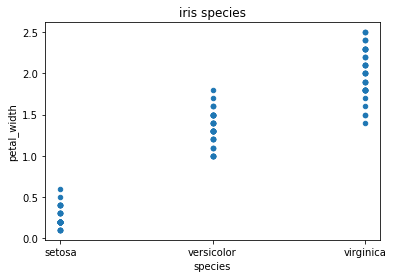

In [62]:
# use plotting to look for differences between the species
df.plot.scatter(x = 'species', y = 'petal_width', title = 'iris species')

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

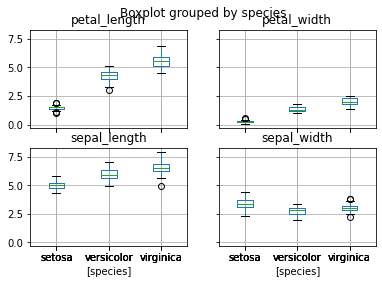

In [65]:
df.boxplot(by = 'species')

<AxesSubplot:xlabel='species'>

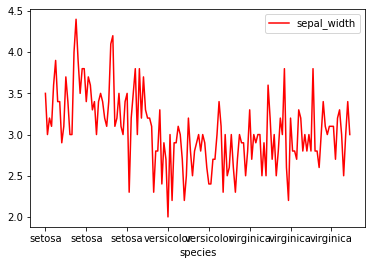

In [75]:
df.plot(kind = 'line', x = 'species', y = 'sepal_width', color = 'red')

<AxesSubplot:>

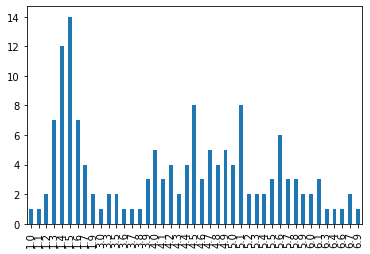

In [76]:
df['petal_length'].value_counts().sort_index().plot.bar()

In [86]:
# map species to a numeric value so that plots can be colored by category
df['species_num'] = df.species.map({'setosa':0, 'versicolor':1, 'virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


## Task 4

In [88]:
df["petal_area"] = df.petal_length * df.petal_width

In [89]:
df.groupby("species").petal_area.describe().unstack()

       species   
count  setosa        50.000000
       versicolor    50.000000
       virginica     50.000000
mean   setosa         0.362800
       versicolor     5.720400
       virginica     11.296200
std    setosa         0.183248
       versicolor     1.368403
       virginica      2.157412
min    setosa         0.110000
       versicolor     3.300000
       virginica      7.500000
25%    setosa         0.265000
       versicolor     4.860000
       virginica      9.717500
50%    setosa         0.300000
       versicolor     5.615000
       virginica     11.445000
75%    setosa         0.420000
       versicolor     6.750000
       virginica     12.790000
max    setosa         0.960000
       versicolor     8.640000
       virginica     15.870000
dtype: float64

<AxesSubplot:title={'center':'petal_area'}, xlabel='species'>

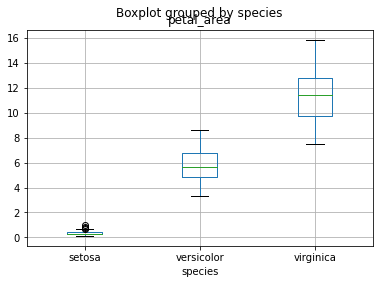

In [91]:
df.boxplot(column="petal_area", by="species")

In [95]:
df[(df.petal_area > 5) & (df.petal_area < 8)].sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
95,5.7,3.0,4.2,1.2,versicolor,1,5.04
53,5.5,2.3,4.0,1.3,versicolor,1,5.20
71,6.1,2.8,4.0,1.3,versicolor,1,5.20
89,5.5,2.5,4.0,1.3,versicolor,1,5.20
90,5.5,2.6,4.4,1.2,versicolor,1,5.28
99,5.7,2.8,4.1,1.3,versicolor,1,5.33
88,5.6,3.0,4.1,1.3,versicolor,1,5.33
59,5.2,2.7,3.9,1.4,versicolor,1,5.46
96,5.7,2.9,4.2,1.3,versicolor,1,5.46
94,5.6,2.7,4.2,1.3,versicolor,1,5.46


## Bonus

In [92]:
# define function that accepts a row of data and returns a predicted species
def classify_species(row):
    petal_area = (row[2] * row[3])
    
    if petal_area < 2:
        prediction = "setosa"
    elif petal_area < 7.5: 
        prediction = "versicolor"
    else: 
        prediction = "virginica"
    
    factorize = {'setosa':0, 'versicolor':1, 'virginica':2}    
    return factorize[prediction]